In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("placement.csv")

In [8]:
df.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


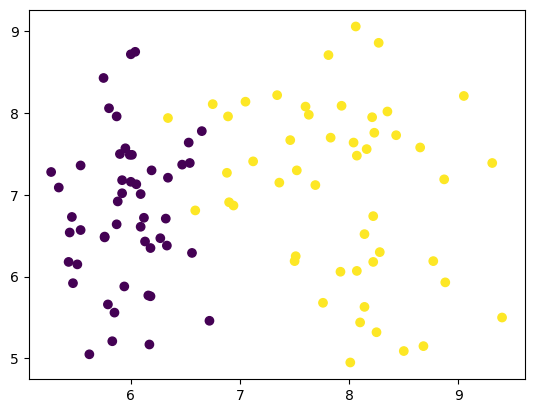

In [10]:
plt.scatter(df['cgpa'],df['resume_score'],c=df['placed'])

In [11]:
x = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [12]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

c:\Users\KIIT0001\Desktop\Deep_learning\venv\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [13]:
model = Sequential()

model.add(Dense(3,activation='relu',input_dim = 2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

c:\Users\KIIT0001\Desktop\Deep_learning\venv\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.get_weights()

[array([[-0.35740733, -0.74209094,  0.37916505],
        [-0.946676  , -0.41451132, -0.05917561]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.15650952],
        [-0.17250597],
        [-0.6029002 ]], dtype=float32),
 array([0.], dtype=float32)]

In [15]:
initial_weights = model.get_weights()

In [16]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.zeros(model.get_weights()[2].shape)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)

In [17]:
model.set_weights(initial_weights)

In [18]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [19]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
history = model.fit(x,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step - accuracy: 0.4125 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6932
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6933
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss: 0.6934
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5125 - loss: 0.6931 - val_accuracy: 0.4500 - val_loss

In [22]:
model.get_weights()

[array([[0., 0., 0.],
        [0., 0., 0.]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[0.],
        [0.],
        [0.]], dtype=float32),
 array([0.02792113], dtype=float32)]

In [24]:
from mlxtend.plotting import plot_decision_regions

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 750us/step


<Axes: >

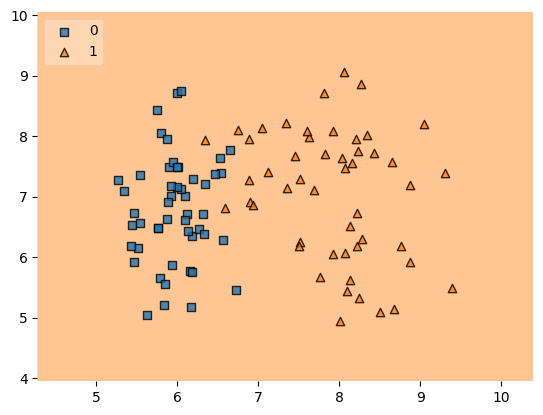

In [25]:
plot_decision_regions(x,y.astype('int'),clf=model,legend=2)